目標: 了解利用 PANDAS 整理資料, 利用資料視覺化可以很快的判斷結果

重點: 資料整理與視覺化可以加速理解機器學習

作業: (1) 繪製 SWARM 
    (2) 繪製 FaceGrid

In [1]:
# 載入相關的程式庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
### 利用 PANDAS 取得酒的品質資料 
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

In [3]:
#資料整理
df_red["color"] = "R"
df_white["color"] = "W"

#整合紅酒與白酒的資料
df_all=pd.concat([df_red,df_white],axis=0,ignore_index=True)

# 檢查合併後的資料集
df_all.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,W
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,W
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,W
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,W
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,W


In [4]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                       'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [5]:
#處理缺失值
df = pd.get_dummies(df_all, columns=["color"])
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.2% of the points

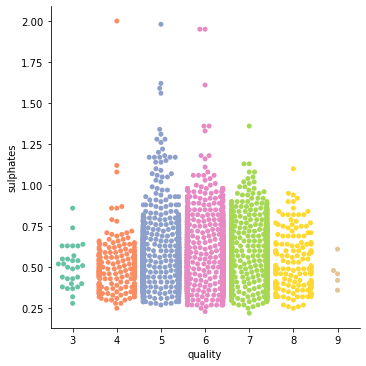

In [6]:
'''
Swarm沿分類軸(質量)調整記錄。這種繪圖將記錄分別標記,而不會重疊。這就是為什麼它最適合小型數據集的原因。
在此圖表中,可以看到硫酸鹽的數量,根據品質。品質值為 6 的硫酸鹽密度最高,品質等級為 9 和 3 的最低
'''
sns.catplot(x="quality",y="sulphates",data=df_all,kind="swarm",palette="Set2")

C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.war

C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\distributions.py:1134: UserWarning: colors parameter ignored when using hue mapping.
  warnings.war

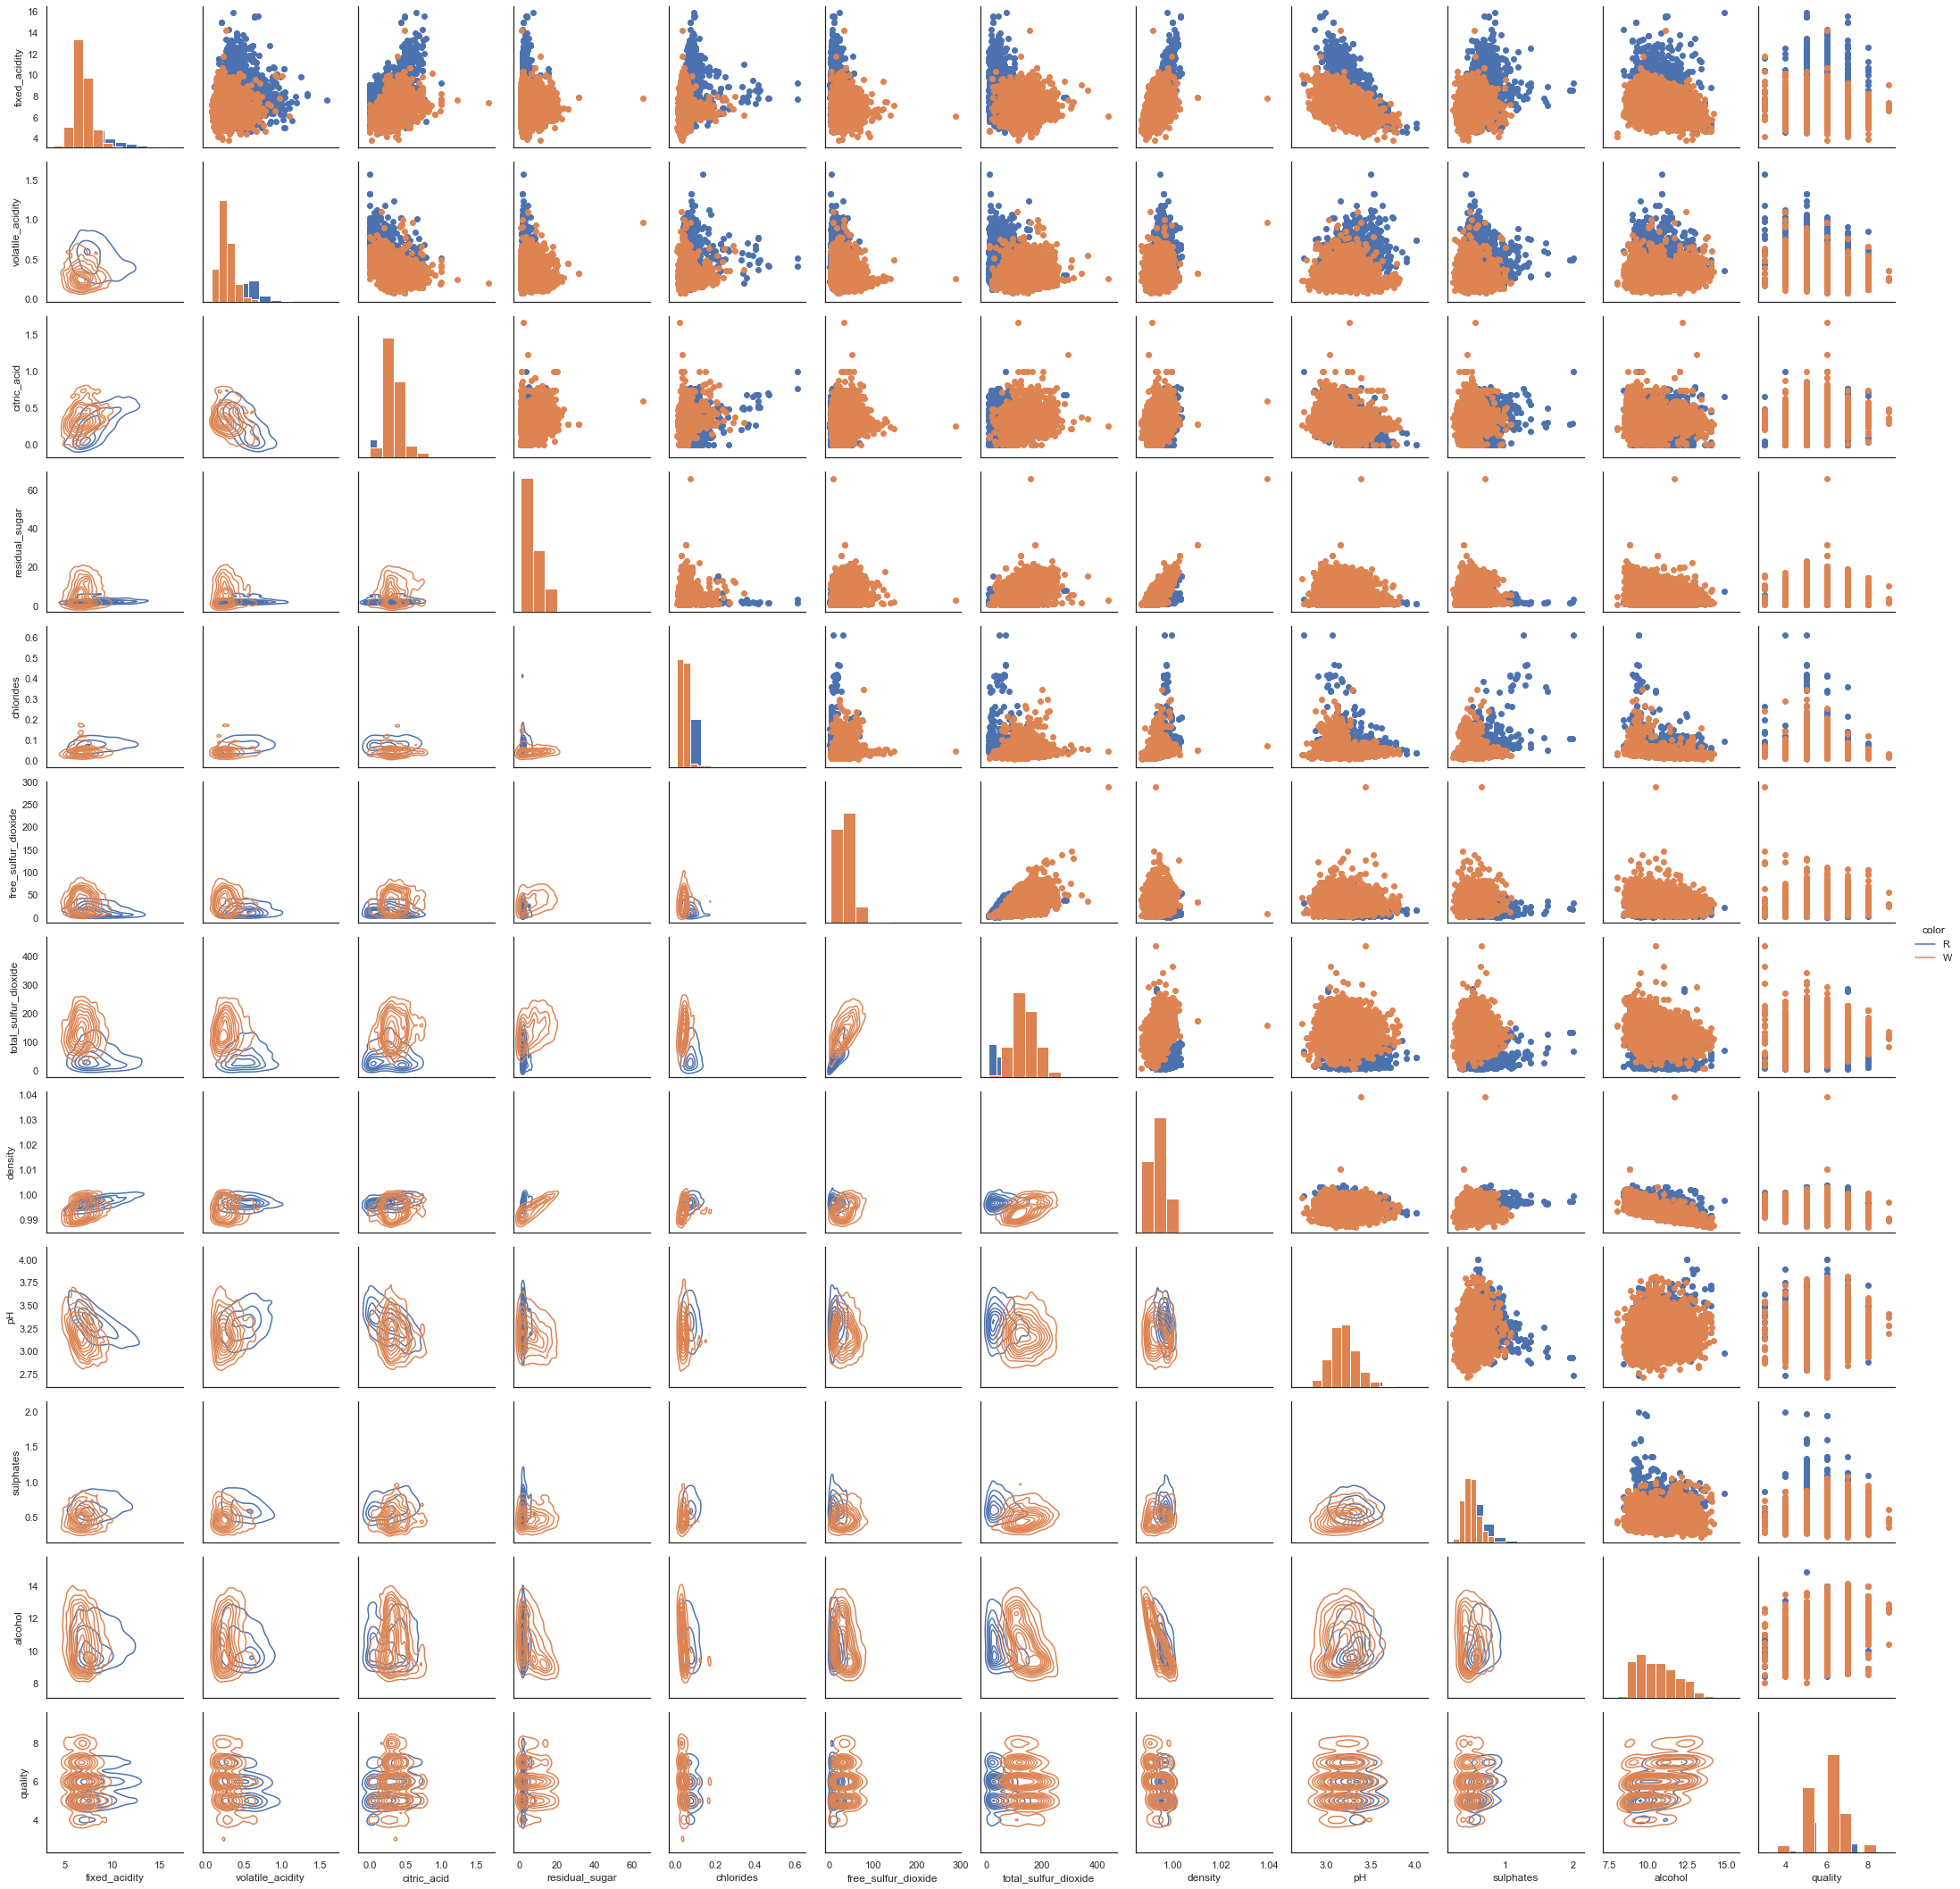

In [7]:
'''
PairGrid 允許我們使用相同的繪圖類型繪製子圖網格來可視化數據。
與 FacetGrid 不同,它在每個子圖使用不同的變數對。它形成子圖的矩陣。它有時也被稱為"散點圖矩陣"。
對網格的用法與分面網格類似。首先初始化網格,然後傳遞繪圖函數。
'''
sns.set(style="white")
g=sns.PairGrid(df_all,hue="color")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot,colors="CO")
g.map_diag(plt.hist)
g.add_legend()